## Dimensionality Reduction of Data
- Now that the original movies_df dataset has been cleaned (removal/substitution of NaN values) and expanded (via pd.Dummies()), the resulting dataframe is large, with many variables, and needs to be reduced down to important data columns.

In [1]:
# Import data
%store -r movies_clean

In [2]:
# Describe data
movies_clean.describe()

,title,tagline,revenue,budget,id,original_language,overview,release_date,runtime,status,...,spoken_lang_বাংলা,spoken_lang_ਪੰਜਾਬੀ,spoken_lang_தமிழ்,spoken_lang_తెలుగు,spoken_lang_ภาษาไทย,spoken_lang_ქართული,spoken_lang_广州话 / 廣州話,spoken_lang_日本語,spoken_lang_普通话,spoken_lang_한국어/조선말
count,4799.000000,4799.000000,4.799000e+03,4.799000e+03,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,...,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.00000
mean,1704.721400,1949.698479,8.232920e+07,2.906593e+07,56899.920192,7.033757,1706.030631,1261.191498,106.903105,1.000417,...,0.000208,0.000834,0.000834,0.000208,0.008335,0.000208,0.010002,0.020213,0.022296,0.00646
std,1198.729437,1042.742690,1.629076e+08,4.073251e+07,88236.500208,2.423680,1199.705534,882.506008,22.561305,0.040831,...,0.014435,0.028861,0.028861,0.014435,0.090925,0.014435,0.101592,0.145116,0.155900,0.08012
min,0.000000,0.000000,0.000000e+00,0.000000e+00,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,599.000000,1184.500000,0.000000e+00,8.000000e+05,9012.500000,7.000000,599.500000,467.000000,94.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1558.000000,1905.000000,1.918402e+07,1.500000e+07,14623.000000,7.000000,1559.000000,1129.000000,103.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2756.500000,2751.500000,9.295652e+07,4.000000e+07,58461.500000,7.000000,2758.500000,2049.500000,118.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,3955.000000,3943.000000,2.787965e+09,3.800000e+08,447027.000000,28.000000,3958.000000,2885.000000,338.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.00000


*Observations*: A dataset with 4799 instances (rows) and 15008 variables (columns) per instance is relatively large. Now, it's time to assess which features are key indicators for determingin the revenue of a movie. 

### Target Variable: Movie Revenue (movies_clean['revenue'])

In [3]:
# Assess shape of data
movies_clean.shape

(4799, 15008)

#### Split data into X (features) and y (target)

In [15]:
# Separate out the features (X)
X_features = movies_clean.copy().drop(columns='revenue')
print(X_features.shape)

# Save feature column labels in list
feature_list = list(X_features.columns)

# Separate out the target (y)
y = movies_clean['revenue'].values
print(y.shape)

(4799, 15007)
(4799,)


## t-Distributed Stochastic Neighbor Embedding (t-SNE)
- maps the multi-dimensional data to a lower dimensional space
- finds patterns in the data by identifying observed clusters based on similarity of data points with multiple features

In [13]:
# Import necessary modules
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [19]:
# Create a PCA instance
pca = PCA(n_components=4799, whiten=False, random_state=42)

# Fit/Transform pca model to features
X_pca = pca.fit_transform(X_features)
X_pca_reconst = pca.inverse_transform(X_pca)

In [20]:
X_pca.shape

(4799, 4799)

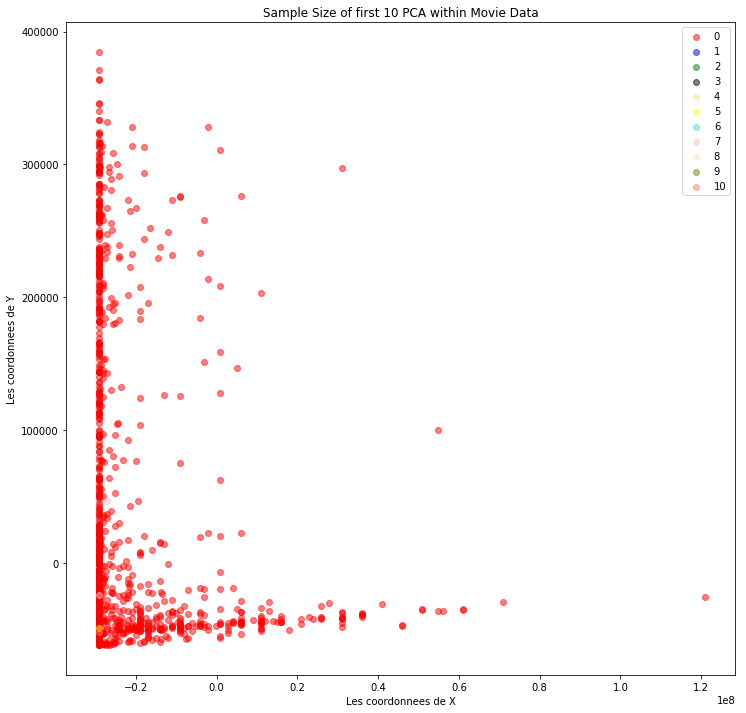

In [21]:
plt.figure(figsize=(12,12))

plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(X_pca[y==3, 0], X_pca[y==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(X_pca[y==4, 0], X_pca[y==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(X_pca[y==5, 0], X_pca[y==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(X_pca[y==6, 0], X_pca[y==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(X_pca[y==7, 0], X_pca[y==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(X_pca[y==8, 0], X_pca[y==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(X_pca[y==9, 0], X_pca[y==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(X_pca[y==10, 0], X_pca[y==10, 1], color='coral', alpha=0.5,label='10')
plt.title("Sample Size of first 10 PCA within Movie Data")
plt.ylabel('Les coordonnees de Y')
plt.xlabel('Les coordonnees de X')
plt.legend()
plt.show()